In [39]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
df = pd.read_csv("/Users/hj/Documents/무제/스터디/data/19~20(완성본).csv")
df

,event_time,event_type,product_id,brand,price,user_id,new_user_session(15m)
0,2020-01-01 23:18:23,view,5847335,unknown_brand,7.14,43695999,3c99ae79-6807-4a74-a314-1ac335ff8bfc
1,2020-01-01 23:19:09,view,5847335,unknown_brand,7.14,43695999,3c99ae79-6807-4a74-a314-1ac335ff8bfc
2,2020-01-01 23:19:21,view,5847335,unknown_brand,7.14,43695999,3c99ae79-6807-4a74-a314-1ac335ff8bfc
3,2020-01-01 23:19:25,view,5847336,unknown_brand,7.14,43695999,3c99ae79-6807-4a74-a314-1ac335ff8bfc
4,2020-01-01 23:19:33,view,5837651,unknown_brand,5.56,43695999,3c99ae79-6807-4a74-a314-1ac335ff8bfc
...,...,...,...,...,...,...,...
19497287,2020-02-29 20:30:03,view,5854286,orly,12.70,622049045,84d38de8-2fac-4518-8511-31964ece0024
19497288,2020-02-29 20:29:30,view,24363,depilflax,15.87,622048897,dc8c46ad-c3fd-449a-9327-f71b8c6d4d62
19497289,2020-02-29 20:34:17,view,5764715,italwax,30.16,622048897,dc8c46ad-c3fd-449a-9327-f71b8c6d4d62
19497290,2020-02-29 20:35:11,view,24363,depilflax,15.87,622048897,dc8c46ad-c3fd-449a-9327-f71b8c6d4d62


# 무슨 시간대에 고객을 유입시켜야 구매율이 높은지 ??
# 어떤 시간대는 눈팅하는 시간, 어떤 시간에 본격적으로 구매하는 ㅅㅣ간인지 확인하고 그에 맞는 쿠폰 전략 세우기
# 카트에 담고 몇분이내에 구매해야 최종 구매까지 이어지는지

In [41]:
df[df['event_type']=='purchase']

,event_time,event_type,product_id,brand,price,user_id,new_user_session(15m)
282,2019-10-02 19:56:18,purchase,5664505,unknown_brand,1.11,29025780,f0c55e24-98da-40de-911e-4fbf98445c46
283,2019-10-02 19:56:18,purchase,5815568,soleo,0.71,29025780,f0c55e24-98da-40de-911e-4fbf98445c46
284,2019-10-02 19:56:18,purchase,5815570,soleo,0.71,29025780,f0c55e24-98da-40de-911e-4fbf98445c46
285,2019-10-02 19:56:18,purchase,5815571,soleo,0.71,29025780,f0c55e24-98da-40de-911e-4fbf98445c46
286,2019-10-02 19:56:18,purchase,5815573,soleo,1.41,29025780,f0c55e24-98da-40de-911e-4fbf98445c46
...,...,...,...,...,...,...,...
19497197,2020-02-29 20:16:04,purchase,5761411,ingarden,2.86,622009276,7d45918d-13ca-4f8d-8b26-038f6c283187
19497198,2020-02-29 20:16:04,purchase,5825598,unknown_brand,0.56,622009276,7d45918d-13ca-4f8d-8b26-038f6c283187
19497199,2020-02-29 20:16:04,purchase,5845433,beautix,9.37,622009276,7d45918d-13ca-4f8d-8b26-038f6c283187
19497200,2020-02-29 20:16:04,purchase,5859180,unknown_brand,2.19,622009276,7d45918d-13ca-4f8d-8b26-038f6c283187


In [43]:
df[df['user_id']==465496]

,event_time,event_type,product_id,brand,price,user_id,new_user_session(15m)
160,2020-01-14 16:15:21,view,5865526,cnd,10.0,465496,7c0333c1-77f2-40a4-b51e-ce829137214c
161,2020-01-14 16:25:35,view,5769989,cnd,10.0,465496,7c0333c1-77f2-40a4-b51e-ce829137214c
162,2020-01-14 16:27:31,view,5865524,cnd,10.0,465496,7c0333c1-77f2-40a4-b51e-ce829137214c


## new_session 지속시간

In [44]:

session_duration = df.groupby(['user_id', 'new_user_session(15m)']).agg(
    session_start = ('event_time', 'min'),
    session_end = ('event_time', 'max')
).reset_index()

session_duration['session_duraion'] = (pd.to_datetime(session_duration['session_end']) -
                                       pd.to_datetime(session_duration['session_start'])).dt.total_seconds()

In [45]:
session_duration

,user_id,new_user_session(15m),session_start,session_end,session_duraion
0,465496,7c0333c1-77f2-40a4-b51e-ce829137214c,2020-01-14 16:15:21,2020-01-14 16:27:31,730.0
1,1120748,b2a05f62-57b5-419f-8eef-72b9eda9f70a,2019-11-04 15:28:57,2019-11-04 15:28:57,0.0
2,1180452,73b45bd1-9ec8-46b3-af51-def73a5a81ba,2019-12-28 14:32:56,2019-12-28 14:32:56,0.0
3,1458813,1f332537-0c4d-46ca-8477-97e7d3260b0b,2019-11-21 06:02:40,2019-11-21 06:02:40,0.0
4,1458813,2030527b-3ea4-47a6-9cc0-966d3fcb68c2,2019-11-19 09:56:09,2019-11-19 09:56:09,0.0
...,...,...,...,...,...
3504625,622090016,c7ab5f5a-9869-48c9-b572-4e9ee156f283,2020-02-29 23:54:38,2020-02-29 23:56:15,97.0
3504626,622090043,a4bd7050-c0ef-459e-9e51-aacad65abac2,2020-02-29 23:57:23,2020-02-29 23:59:45,142.0
3504627,622090052,0be76b63-fc1b-432b-8e97-32d442b6beae,2020-02-29 23:56:15,2020-02-29 23:57:24,69.0
3504628,622090098,a5e34361-0bd6-4a0d-81cb-4704d4af1887,2020-02-29 23:55:13,2020-02-29 23:55:13,0.0


array([[<Axes: title={'center': 'session_duraion'}>]], dtype=object)

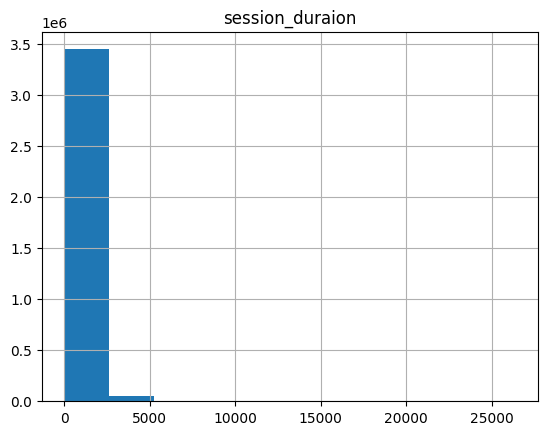

In [46]:
session_duration.hist('session_duraion')

In [47]:
average_durataion_5m = session_duration['session_duraion'].mean()
median_duration_5m = session_duration['session_duraion'].median()

print("각 세션의 시작 시간, 종료 시간 및 지속 시간:")
print(f"\n평균 세션(5m) 길이 (초): {average_durataion_5m:.2f}초")
print(f"\n중앙값 세션(5m) 길이 (초) : {median_duration_5m}")

각 세션의 시작 시간, 종료 시간 및 지속 시간:

평균 세션(5m) 길이 (초): 276.28초

중앙값 세션(5m) 길이 (초) : 0.0


In [48]:
def calculate_session_durations(df, session_columns):
    
    result = pd.DataFrame()
    
    for col in session_columns:
        session_duration = df.groupby(['user_id', col]).agg(
            session_start = ('event_time', 'min'),
            session_end = ('event_time', 'max')
        ).reset_index()
        
        session_duration[f'{col}_duration'] = (
            pd.to_datetime(session_duration['session_end']) -
            pd.to_datetime(session_duration['session_start'])
        ).dt.total_seconds()
        
        result = pd.concat([result, session_duration[['user_id', col, f'{col}_duration']]], axis=0)
        
    return result

In [ ]:
session_columns = ['new_user_session(15m)']
session_duration = calculate_session_durations(df, session_columns)

In [ ]:
session_duration

,user_id,new_user_session(5m),new_user_session(5m)_duration,new_user_session(15m),new_user_session(15m)_duration,new_user_session(30m),new_user_session(30m)_duration,new_user_session(1h),new_user_session(1h)_duration
0,465496,e8f494f7-d014-4713-affd-7d9a39890aef,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,465496,f4bc54ff-9ac5-4762-9310-cd34bdf535ed,116.0,NaN,NaN,NaN,NaN,NaN,NaN
2,1120748,f4bc54ff-9ac5-4762-9310-cd34bdf535ed,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,1180452,f4bc54ff-9ac5-4762-9310-cd34bdf535ed,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,1458813,00c06640-a600-45b6-8e6a-7c3b9a37c147,862.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
3186254,622090016,NaN,NaN,NaN,NaN,NaN,NaN,b55cd62a-af59-47a9-a272-f05bf7fe5561,97.0
3186255,622090043,NaN,NaN,NaN,NaN,NaN,NaN,b55cd62a-af59-47a9-a272-f05bf7fe5561,142.0
3186256,622090052,NaN,NaN,NaN,NaN,NaN,NaN,b55cd62a-af59-47a9-a272-f05bf7fe5561,69.0
3186257,622090098,NaN,NaN,NaN,NaN,NaN,NaN,b55cd62a-af59-47a9-a272-f05bf7fe5561,0.0


In [ ]:
session_duration.isnull().sum()

user_id                                  0
new_user_session(5m)              10011675
new_user_session(5m)_duration     10011675
new_user_session(15m)             10690734
new_user_session(15m)_duration    10690734
new_user_session(30m)             10874578
new_user_session(30m)_duration    10874578
new_user_session(1h)              11009105
new_user_session(1h)_duration     11009105
dtype: int64

# flex 임시 -> session 최종으로 코드 수정

In [ ]:
dff = pd.read_parquet('/Users/hj/Documents/무제/스터디/df_flex.parquet')
dff

,event_time,event_type,product_id,category_id,brand,price,user_id,user_session,new_user_session(5m),new_user_session(15m),new_user_session(30m),new_user_session(1h),new_user_session_flex
13258472,2020-01-14 16:15:21+00:00,view,5865526,1487580008447738866,cnd,10.00,465496,8ad668e6-9567-4da9-b43b-250f12ecab5b,3cf3fcda-03e6-4dfa-89b8-8377d2fde561,e27857bc-2d42-47e1-8a41-9f5cc9885d11,1c4aeb9f-b514-49f5-999b-48223449f483,77178e74-df60-4b0e-bd4a-b85f5d16607b,8ad668e6-9567-4da9-b43b-250f12ecab5b
13259663,2020-01-14 16:25:35+00:00,view,5769989,1487580008447738866,cnd,10.00,465496,d4b9b57f-237c-4427-80e1-b0073b0b0b6c,af9ddd98-50e7-4ae5-bc49-a3687242b6a2,e27857bc-2d42-47e1-8a41-9f5cc9885d11,1c4aeb9f-b514-49f5-999b-48223449f483,77178e74-df60-4b0e-bd4a-b85f5d16607b,01df9fd3-126d-4e1b-9f2c-d668dceeba31
13259917,2020-01-14 16:27:31+00:00,view,5865524,1487580008447738866,cnd,10.00,465496,d4b9b57f-237c-4427-80e1-b0073b0b0b6c,af9ddd98-50e7-4ae5-bc49-a3687242b6a2,e27857bc-2d42-47e1-8a41-9f5cc9885d11,1c4aeb9f-b514-49f5-999b-48223449f483,77178e74-df60-4b0e-bd4a-b85f5d16607b,01df9fd3-126d-4e1b-9f2c-d668dceeba31
4302946,2019-11-04 15:28:57+00:00,view,5240,1487580009202712597,runail,4.05,1120748,d0484d94-7ac1-44e8-a310-2360da11ad9d,af9ddd98-50e7-4ae5-bc49-a3687242b6a2,e27857bc-2d42-47e1-8a41-9f5cc9885d11,1c4aeb9f-b514-49f5-999b-48223449f483,77178e74-df60-4b0e-bd4a-b85f5d16607b,d0484d94-7ac1-44e8-a310-2360da11ad9d
11428466,2019-12-28 14:32:56+00:00,view,5881337,1487580012096782476,fedua,25.40,1180452,a4818e6d-9069-4aa8-8731-572ac266283f,af9ddd98-50e7-4ae5-bc49-a3687242b6a2,e27857bc-2d42-47e1-8a41-9f5cc9885d11,1c4aeb9f-b514-49f5-999b-48223449f483,77178e74-df60-4b0e-bd4a-b85f5d16607b,a4818e6d-9069-4aa8-8731-572ac266283f
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19583739,2020-02-29 23:59:45+00:00,view,5850628,1602943681873052386,grattol,5.24,622090043,ab7d349f-db5d-4790-8ab1-31e5c894459d,7f9d3bd2-49af-4c32-8fd8-f45cd8121f69,f2d770ba-b7c3-4bbf-b44d-11d9d8a1a53e,c99f6bf4-7a12-487d-974a-2c592a5e4132,14591618-dd89-4a0a-9413-73f871dc8d25,ab7d349f-db5d-4790-8ab1-31e5c894459d
19583671,2020-02-29 23:56:15+00:00,view,5931986,1597770225539875791,None,3.65,622090052,5872302d-7a37-4e86-96f3-f7ea373d2eb5,7f9d3bd2-49af-4c32-8fd8-f45cd8121f69,f2d770ba-b7c3-4bbf-b44d-11d9d8a1a53e,c99f6bf4-7a12-487d-974a-2c592a5e4132,14591618-dd89-4a0a-9413-73f871dc8d25,5872302d-7a37-4e86-96f3-f7ea373d2eb5
19583691,2020-02-29 23:57:24+00:00,view,5688691,1783999072332415142,markell,3.02,622090052,062d2f70-2039-4e9d-8530-ec12874e8cf0,7f9d3bd2-49af-4c32-8fd8-f45cd8121f69,f2d770ba-b7c3-4bbf-b44d-11d9d8a1a53e,c99f6bf4-7a12-487d-974a-2c592a5e4132,14591618-dd89-4a0a-9413-73f871dc8d25,5872302d-7a37-4e86-96f3-f7ea373d2eb5
19583647,2020-02-29 23:55:13+00:00,view,5650609,1487580009336930331,metzger,14.13,622090098,aba3b9a3-c558-4c91-bb2d-d96a77a4a098,7f9d3bd2-49af-4c32-8fd8-f45cd8121f69,f2d770ba-b7c3-4bbf-b44d-11d9d8a1a53e,c99f6bf4-7a12-487d-974a-2c592a5e4132,14591618-dd89-4a0a-9413-73f871dc8d25,aba3b9a3-c558-4c91-bb2d-d96a77a4a098


In [50]:

session_duration = df.groupby(['user_id', 'new_user_session(15m)']).agg(
    session_start = ('event_time', 'min'),
    session_end = ('event_time', 'max')
).reset_index()

session_duration['session_duraion'] = (pd.to_datetime(session_duration['session_end']) -
                                       pd.to_datetime(session_duration['session_start'])).dt.total_seconds()

array([[<Axes: title={'center': 'session_duraion'}>]], dtype=object)

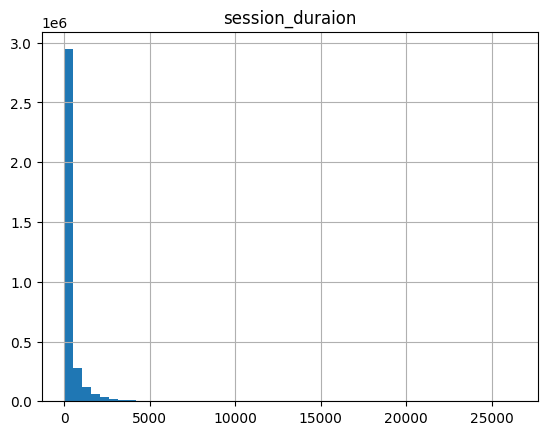

In [51]:
session_duration.hist('session_duraion',bins=50)

In [52]:
session_duration.describe()

,user_id,session_duraion
count,3.504630e+06,3.504630e+06
mean,5.369577e+08,2.762807e+02
std,8.111802e+07,6.643675e+02
min,4.654960e+05,0.000000e+00
25%,5.135276e+08,0.000000e+00
50%,5.623716e+08,0.000000e+00
75%,5.896347e+08,2.300000e+02
max,6.220902e+08,2.638000e+04


In [53]:
def calculate_conversion_rate_by_hour(df):
    # event_time을 datetime 형식으로 변환
    df['event_time'] = pd.to_datetime(df['event_time'])
    
    # 시간대 열 추가
    df['hour'] = df['event_time'].dt.hour
    
    # 시간대별 전체 이벤트 수와 구매 이벤트 수 계산
    total_events = df.groupby('hour').size()
    purchase_events = df[df['event_type'] == 'purchase'].groupby('hour').size()
    
    # 구매율 계산
    conversion_rate = (purchase_events / total_events) * 100
    
    # 결과를 데이터프레임으로 반환
    conversion_rate_df = pd.DataFrame({
        'total_events': total_events,
        'purchase_events': purchase_events,
        'conversion_rate': conversion_rate
    }).reset_index()
    
    return conversion_rate_df

In [54]:
conversion_rate_by_hour = calculate_conversion_rate_by_hour(df)
conversion_rate_by_hour

,hour,total_events,purchase_events,conversion_rate
0,0,190705,11848,6.212737
1,1,172923,11937,6.903072
2,2,189192,12295,6.498689
3,3,260967,15492,5.936383
4,4,372603,22007,5.906286
5,5,567121,35291,6.222834
6,6,767652,50760,6.612371
7,7,915102,62277,6.805471
8,8,1009772,70267,6.958700
9,9,1064983,76445,7.178049


# 세션 길이와 전환율(구매율) 관계 구하기

In [55]:
def calculate_session_length_and_conversion(df, session_col, event_time_col, event_type_col):
    # event_time을 datetime 형식으로 변환
    df[event_time_col] = pd.to_datetime(df[event_time_col])
    
    # 각 세션의 시작 시간과 종료 시간 계산
    session_data = df.groupby([session_col, 'user_id']).agg(
        session_start=(event_time_col, 'min'),
        session_end=(event_time_col, 'max'),
        purchase=('event_type', lambda x: 'purchase' in x.values)  # 구매 여부 확인
    ).reset_index()
    
    # 세션 길이 계산 (초 단위)
    session_data['session_length'] = (session_data['session_end'] - session_data['session_start']).dt.total_seconds()
    
    return session_data

def analyze_conversion_by_session_length(session_data, length_bins):
    # 세션 길이를 구간으로 나누기
    session_data['length_bin'] = pd.cut(session_data['session_length'], bins=length_bins)
    
    # 세션 길이가 0인 경우를 별도로 처리
    session_data['length_bin'] = session_data['length_bin'].cat.add_categories(['0_seconds'])
    session_data.loc[session_data['session_length']== 0, 'length_bin'] = '0_seconds'
    
    # 각 구간별 전환율 계산
    conversion_by_length = session_data.groupby('length_bin').agg(
        total_sessions=('session_length', 'count'),
        conversions=('purchase', 'sum')
    )
    conversion_by_length['conversion_rate'] = (conversion_by_length['conversions'] / conversion_by_length['total_sessions']) * 100
    
    return conversion_by_length.reset_index()


# 세션 길이와 전환율 계산
session_col = 'new_user_session(15m)'  # 세션을 나타내는 컬럼 중 하나 선택
event_time_col = 'event_time'
event_type_col = 'event_type'

# 세션 길이와 전환율 분석을 위한 데이터 생성
session_data = calculate_session_length_and_conversion(df, session_col, event_time_col, event_type_col)

# 세션 길이 구간 설정 (예: 0-5분, 5-10분, 10-30분, 30-60분, 60분 이상)
length_bins = [0, 300, 600, 1800, 3600, np.inf]

# 세션 길이에 따른 전환율 분석
conversion_by_length = analyze_conversion_by_session_length(session_data, length_bins)

/var/folders/qv/tqmmyp0s5dj996k_tcvqmtqm0000gn/T/ipykernel_1435/1869733261.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  conversion_by_length = session_data.groupby('length_bin').agg(


In [56]:
conversion_by_length

,length_bin,total_sessions,conversions,conversion_rate
0,"(0.0, 300.0]",870624,23907,2.745962
1,"(300.0, 600.0]",272742,26293,9.640246
2,"(600.0, 1800.0]",382596,58607,15.318247
3,"(1800.0, 3600.0]",99178,24478,24.680877
4,"(3600.0, inf]",25179,7688,30.533381
5,0_seconds,1854311,16030,0.864472


In [57]:
session_data

,new_user_session(15m),user_id,session_start,session_end,purchase,session_length,length_bin
0,00000462-ee91-4563-8dbf-e548188c6a0c,497014030,2019-11-22 11:03:46,2019-11-22 11:15:21,False,695.0,"(600.0, 1800.0]"
1,000004a7-16b4-4310-b7b6-fec1b7e631a1,568506196,2020-02-23 13:52:32,2020-02-23 13:54:11,False,99.0,"(0.0, 300.0]"
2,00000530-dcf4-4614-8fa4-9c37236a6a8f,253395434,2019-11-04 12:15:22,2019-11-04 12:16:00,False,38.0,"(0.0, 300.0]"
3,00000604-48fb-46d8-b607-6c29239884ee,596747543,2020-01-23 21:49:43,2020-01-23 21:49:43,False,0.0,0_seconds
4,0000091a-ce4e-4e19-9bb7-f87db4070001,561847286,2019-10-19 09:25:42,2019-10-19 09:26:09,False,27.0,"(0.0, 300.0]"
...,...,...,...,...,...,...,...
3504625,ffffcbec-6ab6-4690-8b9b-d03018fc7d54,416410762,2020-01-18 07:26:52,2020-01-18 07:26:52,False,0.0,0_seconds
3504626,ffffdaaa-4343-4d8b-aa9e-6531a12bf650,337725468,2020-01-01 12:28:04,2020-01-01 12:28:25,False,21.0,"(0.0, 300.0]"
3504627,ffffdd19-873d-484f-9dfb-22addf1320c9,587321821,2019-12-15 14:22:14,2019-12-15 14:22:14,False,0.0,0_seconds
3504628,ffffe249-a299-4aeb-b759-9c6553725b45,544212858,2019-10-19 20:12:32,2019-10-19 20:23:18,False,646.0,"(600.0, 1800.0]"


# flex session 오류 확인
### 세션 간  간격 확인 
- 세션이 5분 이내애 정확하게 그룹화되었는지 확인

In [59]:

def validate_session_intervals(df, session_col, event_time_col):
    # event_time을 datetime 형식으로 변환
    df[event_time_col] = pd.to_datetime(df[event_time_col])
    
    # 세션 시작과 종료 시간 계산
    df_sorted = df.sort_values(by=[session_col, 'user_id', event_time_col])
    df_sorted['next_event_time'] = df_sorted.groupby([session_col, 'user_id'])[event_time_col].shift(-1)
    
    # 세션 간 간격 계산
    df_sorted['interval_to_next'] = (df_sorted['next_event_time'] - df_sorted[event_time_col]).dt.total_seconds()
    
    # 5분(300초) 초과 간격 확인
    invalid_sessions = df_sorted[df_sorted['interval_to_next'] > 900]
    
    if not invalid_sessions.empty:
        print("세션 간 15분 이상의 간격이 발견되었습니다:")
        print(invalid_sessions[[session_col, 'user_id', event_time_col, 'next_event_time', 'interval_to_next']])
    else:
        print("모든 세션이 올바르게 그룹화되었습니다.")

# 세션 간의 간격 확인
validate_session_intervals(df, 'new_user_session(15m)', 'event_time')


모든 세션이 올바르게 그룹화되었습니다.


### 각 사용자 ID별로 세션의 시작과 끝 확인
- 동일 'user_id' 내에서 각 세션의 시작과 끝이 올바르게 설정되었는지 확인

In [61]:
def check_session_boundaries(df, session_col, event_time_col):

    df[event_time_col] = pd.to_datetime(df[event_time_col])
    
    # 각 사용자 ID와 세션별로 시작과 종료 시간을 계산
    session_boundaries = df.groupby([session_col, 'user_id']).agg(
        session_start=(event_time_col, 'min'),
        session_end=(event_time_col, 'max')
    ).reset_index()
    
    # 세션의 시작과 종료가 올바른지 검토
    session_boundaries['session_length'] = (session_boundaries['session_end'] - session_boundaries['session_start']).dt.total_seconds()
    
    if (session_boundaries['session_length'] < 0).any():
        print("세션의 종료 시간이 시작 시간보다 이른 경우가 있습니다:")
        print(session_boundaries[session_boundaries['session_length'] < 0])
    else:
        print("세션의 시작과 종료 시간이 올바르게 설정되었습니다.")

# 각 사용자 ID와 세션별로 시작과 종료 시간 확인
check_session_boundaries(df, 'new_user_session(15m)', 'event_time')


세션의 시작과 종료 시간이 올바르게 설정되었습니다.


### 세션 중복 여부 확인
- 각 세션이 다른 'user_id'의 세션과 중첩되었는지 확인

In [ ]:
# def check_session_overlap(df, session_col, user_col, event_time_col):
#     # event_time을 datetime 형식으로 변환
#     df[event_time_col] = pd.to_datetime(df[event_time_col])
    
#     # 세션 시작과 종료 시간 계산
#     df_sorted = df.sort_values(by=[session_col, user_col, event_time_col])
#     df_sorted['next_session_start'] = df_sorted.groupby([user_col])[event_time_col].shift(-1)
    
#     # 세션이 겹치는지 여부 확인
#     overlap = df_sorted[df_sorted['next_session_start'] < df_sorted[event_time_col]]
    
#     if not overlap.empty:
#         print("세션 간 중복이 발견되었습니다:")
#         print(overlap[[session_col, user_col, event_time_col, 'next_session_start']])
#     else:
#         print("세션이 다른 사용자 ID와 중복되지 않습니다.")

# # 세션 중복 여부 확인
# check_session_overlap(dff, 'new_user_session_flex', 'user_id', 'event_time')


In [ ]:
# ## 2트
# def check_session_overlap_across_users(df, session_col, user_col, event_time_col):
#     # event_time을 datetime 형식으로 변환
#     df[event_time_col] = pd.to_datetime(df[event_time_col])

#     # 사용자별로 세션 시작과 종료 시간 계산
#     session_boundaries = df.groupby([user_col, session_col]).agg(
#         session_start=(event_time_col, 'min'),
#         session_end=(event_time_col, 'max')
#     ).reset_index()

#     # 다른 사용자 간의 세션 중복을 확인하기 위해, 데이터 프레임을 전체적으로 정렬
#     session_boundaries_sorted = session_boundaries.sort_values(by=['session_start'])

#     # 다른 사용자와의 중복 여부 확인
#     session_boundaries_sorted['next_user_id'] = session_boundaries_sorted[user_col].shift(-1)
#     session_boundaries_sorted['next_session_start'] = session_boundaries_sorted['session_start'].shift(-1)

#     # 세션 중복을 확인
#     overlap = session_boundaries_sorted[
#         (session_boundaries_sorted['next_user_id'] != session_boundaries_sorted[user_col]) & 
#         (session_boundaries_sorted['next_session_start'] < session_boundaries_sorted['session_end'])
#     ]

#     if not overlap.empty:
#         print("세션 간 중복이 발견되었습니다:")
#         print(overlap[[user_col, session_col, 'session_start', 'session_end', 'next_user_id', 'next_session_start']])
#     else:
#         print("세션이 다른 사용자 ID와 중복되지 않습니다.")

# # 세션 중복 여부 확인
# check_session_overlap_across_users(dff, 'new_user_session_flex', 'user_id', 'event_time')


In [62]:
## 3트 

def check_session_user_id_uniqueness(df, session_col, user_col):
    # 각 세션별로 고유한 user_id의 수를 계산
    session_user_count = df.groupby(session_col)[user_col].nunique().reset_index()
    
    # user_id 수가 1보다 큰 세션이 있는지 확인
    overlapping_sessions = session_user_count[session_user_count[user_col] > 1]
    
    if not overlapping_sessions.empty:
        print(f"중복된 user_id가 할당된 세션이 발견되었습니다: {overlapping_sessions.shape[0]}개")
        print(overlapping_sessions)
    else:
        print("모든 세션이 고유한 user_id를 가지고 있습니다.")
        
# 세션 중복 여부 확인
check_session_user_id_uniqueness(df, 'new_user_session(15m)', 'user_id')


모든 세션이 고유한 user_id를 가지고 있습니다.


# 세션 복귀율(세션 리텐션) 분석

# 세션 시작 시간과 세션 성공률의 상관관계